In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
def load_comprehensive_fifa_data():
    return pd.read_csv(
        'data.csv.zip', 
        compression='zip',
        usecols=['Age', 'Nationality', 'Overall', 'Potential', 'Club',
                 'Value', 'Wage', 'Preferred Foot', 'International Reputation', 'Weak Foot',
                 'Skill Moves', 'Work Rate', 'Position', 'Jersey Number', 'Height', 'Weight', 'Finishing',
                 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
                 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
                 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
                 'Composure', 'Marking', 'StandingTackle','SlidingTackle','GKDiving','GKHandling','GKKicking','GKPositioning',
                 'GKReflexes','Release Clause'])#All the data i want to use as my features

In [3]:
fifa = load_comprehensive_fifa_data()
fifa.head(50)

,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,5.0,4.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,33,Portugal,94,94,Juventus,€77M,€405K,Right,5.0,4.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,5.0,5.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,27,Spain,91,93,Manchester United,€72M,€260K,Right,4.0,3.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,27,Belgium,91,92,Manchester City,€102M,€355K,Right,4.0,5.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,27,Belgium,91,91,Chelsea,€93M,€340K,Right,4.0,4.0,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,32,Croatia,91,91,Real Madrid,€67M,€420K,Right,4.0,4.0,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,31,Uruguay,91,91,FC Barcelona,€80M,€455K,Right,5.0,4.0,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,32,Spain,91,91,Real Madrid,€51M,€380K,Right,4.0,3.0,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,25,Slovenia,90,93,Atlético Madrid,€68M,€94K,Right,3.0,3.0,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M


In [4]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       18207 non-null  int64  
 1   Nationality               18207 non-null  object 
 2   Overall                   18207 non-null  int64  
 3   Potential                 18207 non-null  int64  
 4   Club                      17966 non-null  object 
 5   Value                     18207 non-null  object 
 6   Wage                      18207 non-null  object 
 7   Preferred Foot            18159 non-null  object 
 8   International Reputation  18159 non-null  float64
 9   Weak Foot                 18159 non-null  float64
 10  Skill Moves               18159 non-null  float64
 11  Work Rate                 18159 non-null  object 
 12  Position                  18147 non-null  object 
 13  Jersey Number             18147 non-null  float64
 14  Height

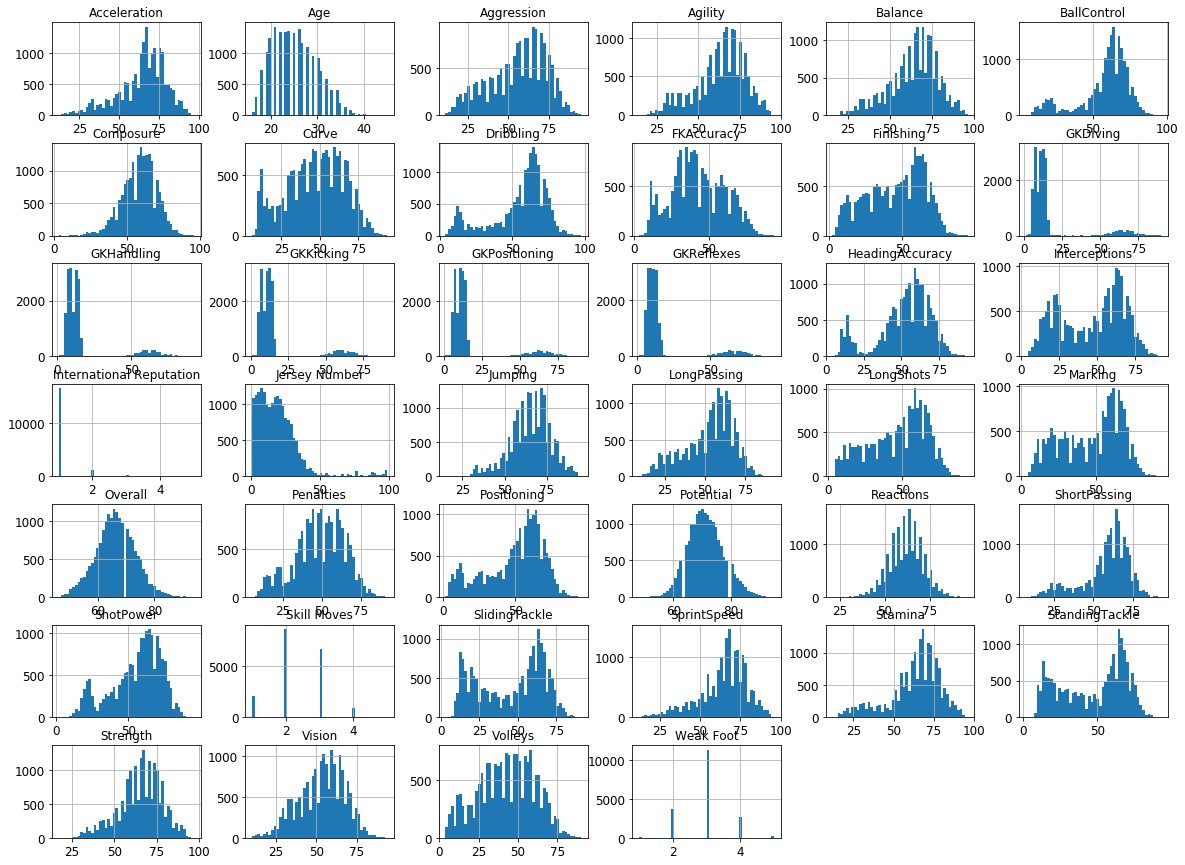

In [5]:
%matplotlib inline
fifa.hist(bins=50, figsize=(20,15))
plt.show()

# Observations 
There are 18207 observations, and 50 attributes, plenty columns have missing values in them

There are 42 Numerical attributes

There are 3 ordinal attributes: Weak Foot, Skill Moves and International Reputation are Ordinal

There are 4 nominal attributes: Nationality, Club, Work Rate, Position

There is one binary data: Preferred Foot

Of all the 42 Numerical attributes, Value, wage, height, weight and release clause need to be worked on

I will work in 7 attributes first to get a feel of how things should be, the attributes are Age, Overall, Potential, Value, Wage, International Reputation, Release Clause

In [6]:
abridged_fifa = pd.DataFrame(fifa, columns=['Age', 'Overall', 'Potential', 'Value', 'Wage', 'International Reputation', 'Release Clause'])

In [7]:
abridged_fifa.head()

,Age,Overall,Potential,Value,Wage,International Reputation,Release Clause
0,31,94,94,€110.5M,€565K,5.0,€226.5M
1,33,94,94,€77M,€405K,5.0,€127.1M
2,26,92,93,€118.5M,€290K,5.0,€228.1M
3,27,91,93,€72M,€260K,4.0,€138.6M
4,27,91,92,€102M,€355K,4.0,€196.4M


In [8]:
abridged_fifa.info()
#International Reputation and Release Clause Contain Empty Values, we have to change the datatypes of Value, wage and Release Clause as well

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       18207 non-null  int64  
 1   Overall                   18207 non-null  int64  
 2   Potential                 18207 non-null  int64  
 3   Value                     18207 non-null  object 
 4   Wage                      18207 non-null  object 
 5   International Reputation  18159 non-null  float64
 6   Release Clause            16643 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 995.8+ KB


In [9]:
abridged_fifa['International Reputation'].median()

1.0

In [10]:
def value_to_number(data_value):
    try:
        value = float(data_value[1:-1])
        suffix = data_value[-1:]
        if suffix == 'M':
            value = value * 1000000
        elif suffix == 'K':
            value = value * 1000
    except ValueError:#catches errors that occur due to $0
        value = 0
    except TypeError:#catches error that occur when we try to convert NA to float
        value = data_value
    
    return value

In [11]:
abridged_fifa['Value'] = abridged_fifa['Value'].apply(value_to_number)
abridged_fifa['Wage'] = abridged_fifa['Wage'].apply(value_to_number)
abridged_fifa['Release Clause'] = abridged_fifa['Release Clause'].apply(value_to_number)

In [12]:
abridged_fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       18207 non-null  int64  
 1   Overall                   18207 non-null  int64  
 2   Potential                 18207 non-null  int64  
 3   Value                     18207 non-null  float64
 4   Wage                      18207 non-null  float64
 5   International Reputation  18159 non-null  float64
 6   Release Clause            16643 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 995.8 KB


In [13]:
abridged_fifa['International Reputation'].value_counts()

1.0    16532
2.0     1261
3.0      309
4.0       51
5.0        6
Name: International Reputation, dtype: int64

In [14]:
abridged_fifa.describe()

,Age,Overall,Potential,Value,Wage,International Reputation,Release Clause
count,18207.000000,18207.000000,18207.000000,1.820700e+04,18207.000000,18159.000000,1.664300e+04
mean,25.122206,66.238699,71.307299,2.410696e+06,9731.312133,1.113222,4.585061e+06
std,4.669943,6.908930,6.136496,5.594933e+06,21999.290406,0.394031,1.111872e+07
min,16.000000,46.000000,48.000000,0.000000e+00,0.000000,1.000000,1.300000e+04
25%,21.000000,62.000000,67.000000,3.000000e+05,1000.000000,1.000000,5.250000e+05
50%,25.000000,66.000000,71.000000,6.750000e+05,3000.000000,1.000000,1.100000e+06
75%,28.000000,71.000000,75.000000,2.000000e+06,9000.000000,1.000000,3.500000e+06
max,45.000000,94.000000,95.000000,1.185000e+08,565000.000000,5.000000,2.281000e+08


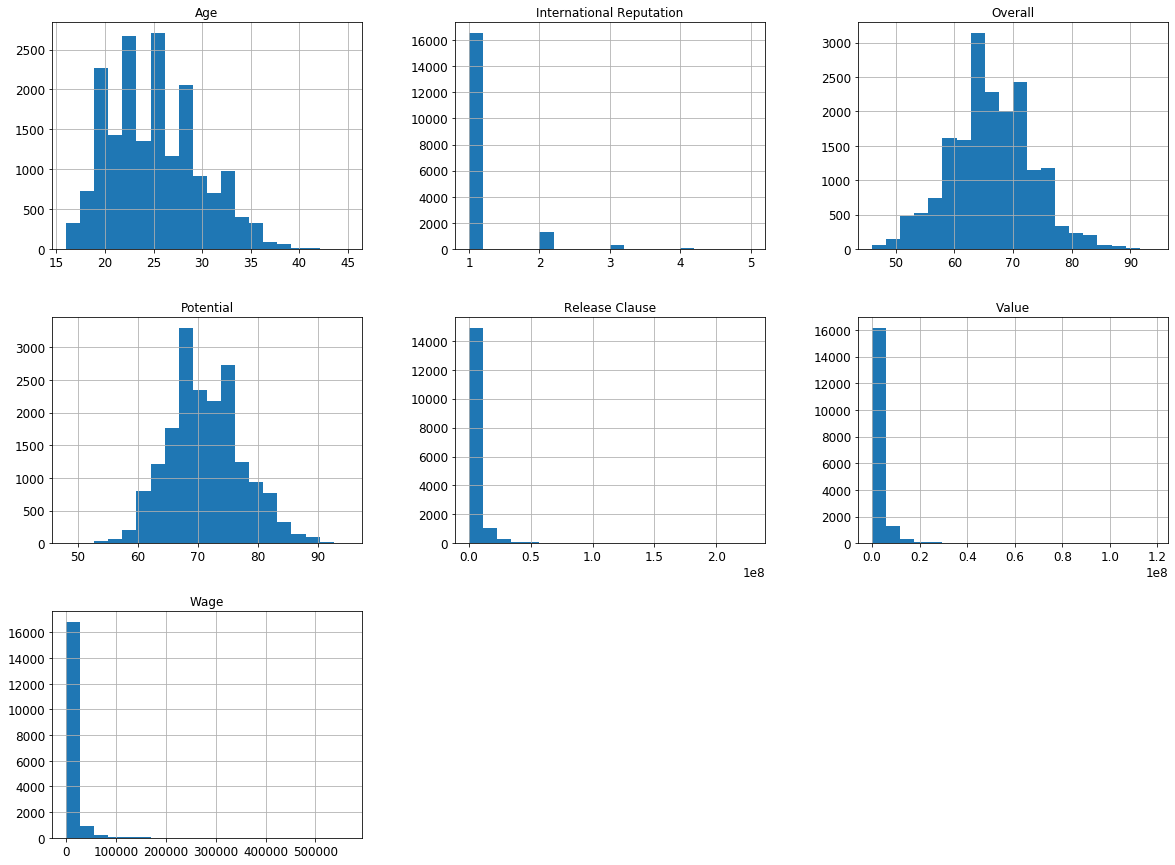

In [15]:
%matplotlib inline
abridged_fifa.hist(bins=20, figsize=(20,15))
plt.show()

In [16]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(abridged_fifa, test_size=0.2, random_state=1)

In [17]:
my_fifa = train_set.copy()

In [18]:
corr_matrix = my_fifa.corr()

In [19]:
corr_matrix["Value"].sort_values(ascending=False)

Value                       1.000000
Release Clause              0.994317
Wage                        0.855409
International Reputation    0.655710
Overall                     0.628722
Potential                   0.578435
Age                         0.072596
Name: Value, dtype: float64

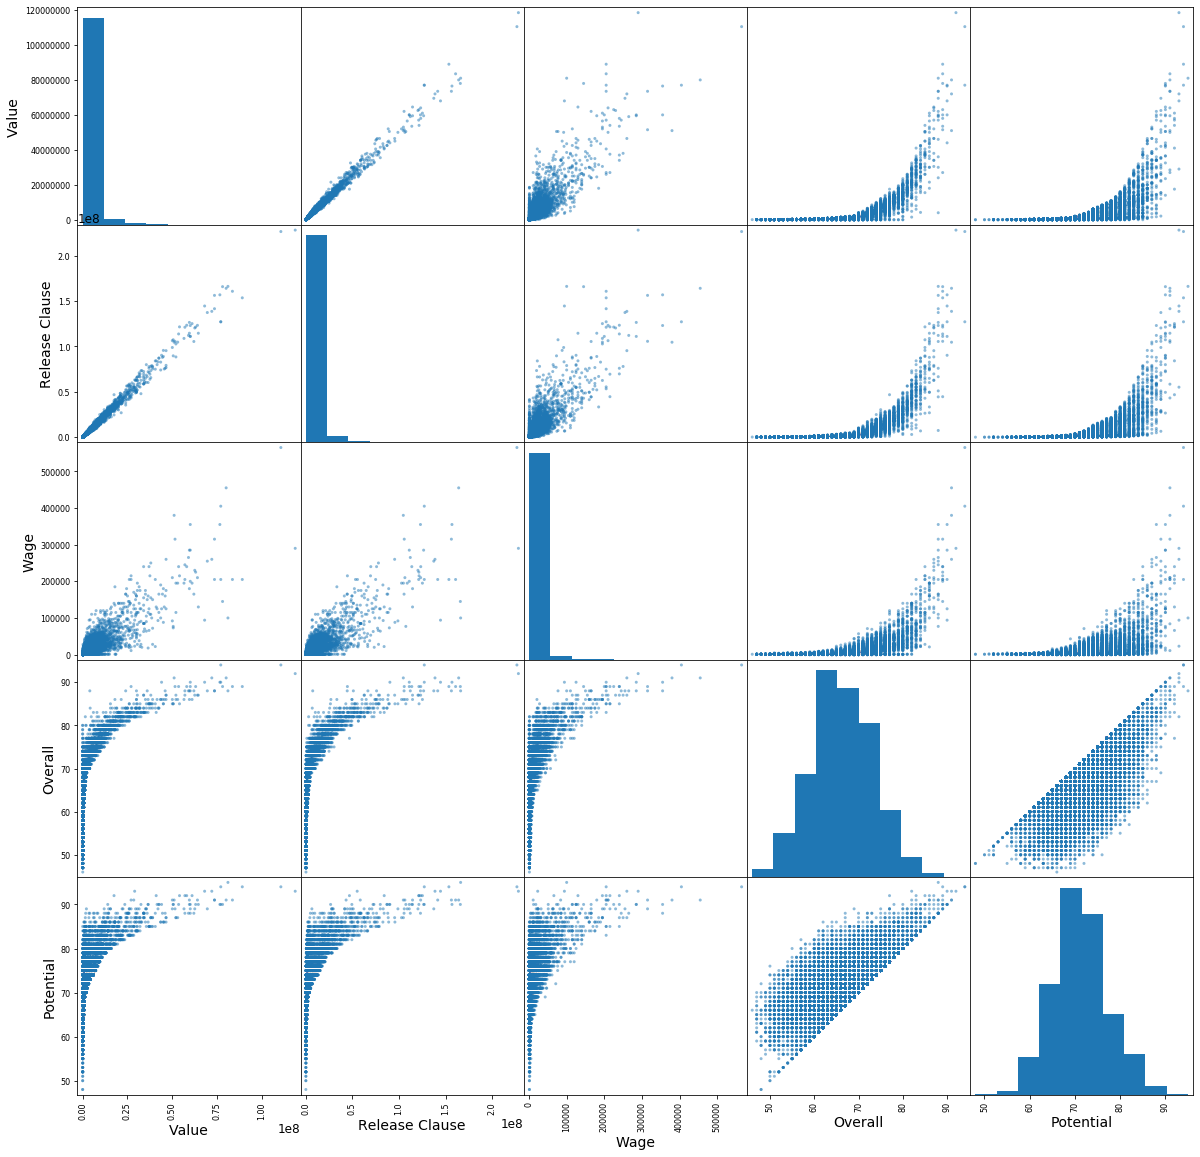

In [20]:
from pandas.plotting import scatter_matrix

attributes = ['Value', 'Release Clause', 'Wage', 'Overall', 'Potential']
scatter_matrix(my_fifa[attributes], figsize=(20, 20));

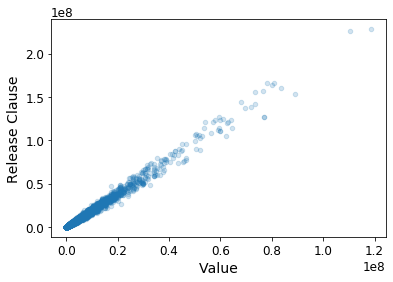

In [21]:
my_fifa.plot(kind="scatter", x="Value", y="Release Clause", alpha=0.2);

In [22]:
my_fifa = train_set.drop('Value', axis=1)
my_fifa_label = train_set['Value'].copy()

In [23]:
sample_incomplete_rows = my_fifa[my_fifa.isnull().any(axis=1)]#.head()
sample_incomplete_rows.head()

,Age,Overall,Potential,Wage,International Reputation,Release Clause
1623,34,75,75,21000.0,1.0,NaN
17437,21,54,64,3000.0,1.0,NaN
6866,29,68,68,0.0,1.0,NaN
2751,25,73,76,6000.0,1.0,NaN
7956,24,67,70,8000.0,1.0,NaN


In [24]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [25]:
my_fifa_num = my_fifa.drop("International Reputation", axis=1)

In [26]:
imputer.fit(my_fifa_num)

SimpleImputer(strategy='median')

In [27]:
imputer.statistics_

array([2.5e+01, 6.6e+01, 7.1e+01, 3.0e+03, 1.1e+06])

In [28]:
my_fifa_nominal = my_fifa[['International Reputation']]
my_fifa_nominal.head()

,International Reputation
14729,1.0
9960,1.0
13747,1.0
1362,2.0
15670,1.0


In [29]:
from sklearn.preprocessing import OneHotEncoder

In [30]:
cat_encoder = OneHotEncoder()
#my_fifa_nominal_1hot = cat_encoder.fit_transform(my_fifa_nominal)

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('encoder', OneHotEncoder(),)
])

In [32]:
from sklearn.compose import ColumnTransformer

num_attribs = list(my_fifa_num)
cat_attribs = ["International Reputation"]

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs),
])

fifa_prepared = full_pipeline.fit_transform(my_fifa)

In [33]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(fifa_prepared, my_fifa_label)

LinearRegression()

In [34]:
some_data = my_fifa.iloc[:5]
some_labels = my_fifa_label.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [-6.144000e+03  7.997440e+05  6.261760e+05  7.666176e+06  1.853440e+05]


In [35]:
print("Labels:", list(some_labels))

Labels: [190000.0, 700000.0, 450000.0, 8000000.0, 210000.0]


In [36]:
from sklearn.metrics import mean_squared_error

fifa_predictions = lin_reg.predict(fifa_prepared)
lin_mse = mean_squared_error(my_fifa_label, fifa_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1116809.7933689507

In [37]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(fifa_prepared, my_fifa_label)

DecisionTreeRegressor(random_state=42)

In [38]:
fifa_predictions = tree_reg.predict(fifa_prepared)
tree_mse = mean_squared_error(my_fifa_label, fifa_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

17612.051971374814

In [39]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, fifa_prepared, my_fifa_label, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [40]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [ 929001.62765156  504161.98444198  626098.90247716  633343.64954226
  933986.84899568  921136.73571263  580182.68310931  634801.24598912
 1533209.37316209  827303.53490712]
Mean: 812322.6585988889
Standard deviation: 284119.2243742042


In [41]:
lin_scores = cross_val_score(lin_reg, fifa_prepared, my_fifa_label, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [1537994.94272717 1048423.14869703  930001.78476561 1039625.30091507
 1378406.951658   1306736.62784615  942054.19051828 1076527.5812308
  945418.07718404 1039506.20624113]
Mean: 1124469.4811783282
Standard deviation: 198585.00723147372


In [42]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(fifa_prepared, my_fifa_label)

RandomForestRegressor(random_state=42)

In [43]:
fifa_predictions = forest_reg.predict(fifa_prepared)
forest_mse = mean_squared_error(my_fifa_label, fifa_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

268104.9065038429

In [44]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, fifa_prepared, my_fifa_label, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [1030499.51644766  417384.3520434   392755.99885374  448982.06142611
 1220258.39016718  709817.46050042  481922.1175486   553589.72733026
  752774.56013518  635070.30639256]
Mean: 664305.4490845122
Standard deviation: 260869.6095858775


In [47]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(fifa_prepared, my_fifa_label)
fifa_predictions = svm_reg.predict(fifa_prepared)
svm_mse = mean_squared_error(my_fifa_label, fifa_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

5864082.165948863

In [88]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [40, 50, 60], 'max_features': [4, 6, 8, 10]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(
    forest_reg, param_grid,
    cv=5, scoring='neg_mean_squared_error',
    return_train_score=True, verbose=1, 
    n_jobs=-1

)

grid_search.fit(fifa_prepared, my_fifa_label)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   48.1s finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid=[{'max_features': [4, 6, 8, 10],
                          'n_estimators': [40, 50, 60]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [89]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 60}

In [90]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=60)

In [91]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

760744.2422344465 {'max_features': 4, 'n_estimators': 40}
721200.128172675 {'max_features': 4, 'n_estimators': 50}
749732.6348802883 {'max_features': 4, 'n_estimators': 60}
726232.3356443534 {'max_features': 6, 'n_estimators': 40}
721416.1881865031 {'max_features': 6, 'n_estimators': 50}
715034.0080684822 {'max_features': 6, 'n_estimators': 60}
717132.4737822467 {'max_features': 8, 'n_estimators': 40}
731984.8473610693 {'max_features': 8, 'n_estimators': 50}
719575.7051477417 {'max_features': 8, 'n_estimators': 60}
735160.6598450899 {'max_features': 10, 'n_estimators': 40}
745243.0223287912 {'max_features': 10, 'n_estimators': 50}
717809.3461993987 {'max_features': 10, 'n_estimators': 60}
1118085.5391461386 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
854992.6240594398 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
932950.4003362434 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
780931.6859995346 {'bootstrap': False, 'max_features': 3, 'n_estimato

In [92]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([8.58723836e-03, 3.12700449e-01, 5.88526505e-02, 8.85408753e-02,
       5.26528647e-01, 2.87682554e-03, 2.39000472e-04, 2.06436217e-04,
       1.93788765e-04, 1.27408915e-03])

In [186]:
extra_attribs = ['International Reputation5',
                 'International Reputation4', 'International Reputation3',
                 'International Reputation2', 'International Reputation1']
attributes = num_attribs + extra_attribs 
sorted(zip(feature_importances, attributes), reverse=True)

[(0.5265286472265127, 'Release Clause'),
 (0.3127004485033964, 'Overall'),
 (0.08854087531754443, 'Wage'),
 (0.05885265045194106, 'Potential'),
 (0.00858723835627726, 'Age'),
 (0.0028768255386899277, 'International Reputation5'),
 (0.001274089151606176, 'International Reputation1'),
 (0.0002390004717139396, 'International Reputation4'),
 (0.00020643621749838576, 'International Reputation3'),
 (0.00019378876481961305, 'International Reputation2')]

In [100]:
final_model = grid_search.best_estimator_

X_test = test_set.drop("Value", axis=1)
y_test = test_set["Value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [187]:
print(final_rmse)

707782.3743336614
